# Chapter 6. 데이터 프레임의 다양한 응용

## 5. 그룹 연산

* 특정 기준을 적용하여 데이터 프레임을 그룹으로 분할하여 처리하는 것
* 데이터 집계, 변환, 필터링에 효율적

**데이터 그룹 분할 3단계**
* 1단계 분할(Split): 데이터를 특정 조건에 의해 분할
* 2단계 적용(Apply): 데이터 집계, 변환, 필터링하는데 필요한 메소드 적용
* 3단계 결합(Combine): 2단계의 처리 결과를 하나로 결합

### 5-1. 그룹 객체 만들기(분할 단계)

#### 1개 열을 기준으로 그룹화
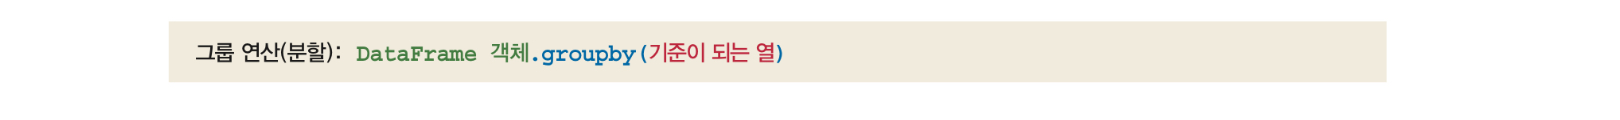

In [ ]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

In [ ]:
# class 열을 기준으로 분할

# grouped

In [ ]:
# 그룹 객체를 iteration으로 출력: head() 메소드로 첫 5행만을 출력
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.head())
    print('\n')
    

In [ ]:
# 연산 메소드 적용

# average 

In [ ]:
# 개별 그룹 선택하기
# get_group 함수, 인자: class 종류

# group3 

#### 여러 열을 기준으로 그룹화 
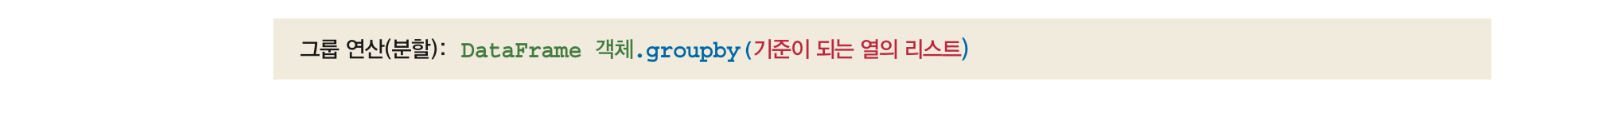

In [ ]:
# class 열, sex 열을 기준으로 분할
# 인자: ['class', 'sex']

# grouped_two

In [ ]:
# grouped_two 그룹 객체를 iteration으로 출력
for key, group in grouped_two:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.head())
    print('\n')
    

In [ ]:
# grouped_two 그룹 객체에 연산 메소드 적용

# average_two 

In [ ]:
# grouped_two 그룹 객체에서 개별 그룹 선택하기
# get_group 함수, 인자: ('Third','female') #튜플

# group3f 

### 5-2. 그룹 연산 메소드 (적용-결합 단계)

#### 데이터 집계 (Data Aggreagation)
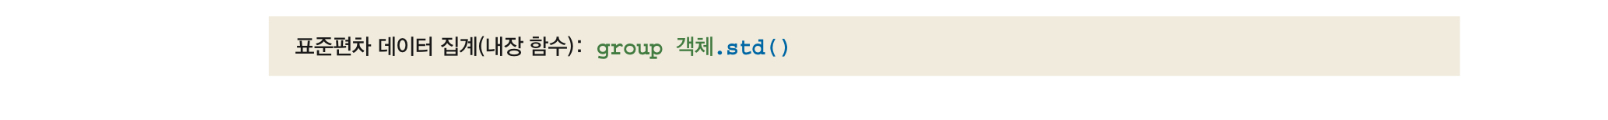
* mean(), max(), min(), sum(), count(), size(), var(), describe(), info(), first(), last() ...

In [ ]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

In [ ]:
# class 열을 기준으로 분할

# grouped

In [ ]:
# 각 그룹에 대한 모든 열의 표준편차를 집계하여 데이터프레임으로 반환

# std_all

In [ ]:
# 각 그룹에 대한 fare 열의 표준편차를 집계하여 시리즈로 반환 
# 객체: grouped.fare

# std_fare 

#### 집계 연산 처리
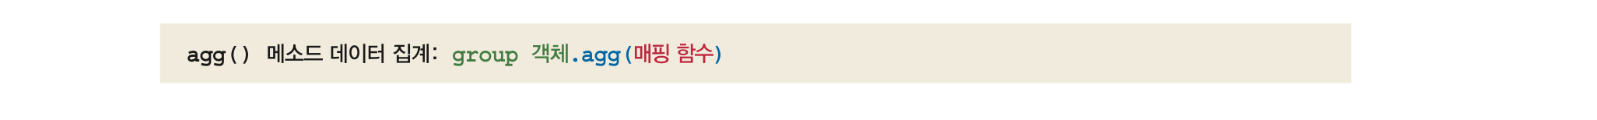

In [ ]:
# 그룹 객체에 agg() 메소드 적용 - 사용자 정의 함수를 인수로 전달
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()

In [ ]:
# 각 그룹의 최대값과 최소값의 차이를 계산하여 그룹별로 집계

# agg_minmax 

#### 여러 함수를 사용하여 각 그룹별 데이터 집계 연산
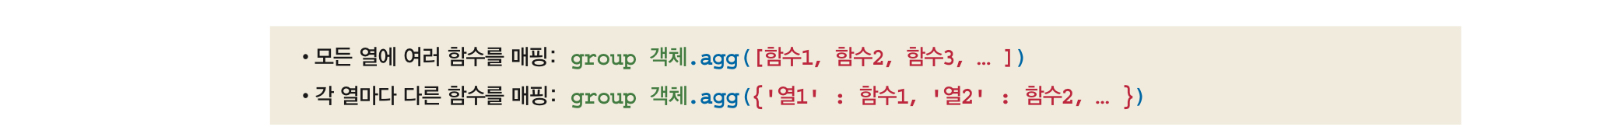

In [ ]:
# 여러 함수를 각 열에 동일하게 적용하여 집계

# agg_all

In [ ]:
# 각 열마다 다른 함수를 적용하여 집계
# {'fare':['min', 'max'], 'age':'mean'}

# agg_sep 

#### 그룹 연산 데이터 변환
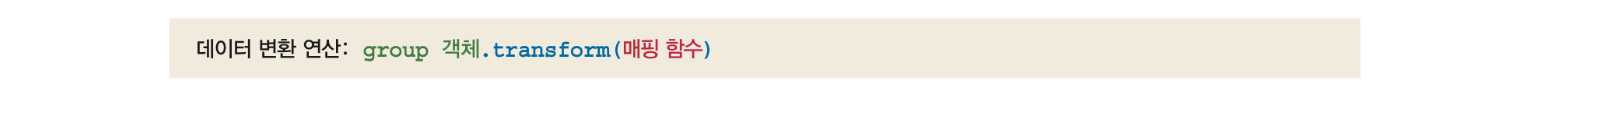
* 메소드를 그룹별로 구분하여 각 원소에 함수를 적용
* 각 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과 반환

##### 집계 연산 메소드를 사용하여 그룹별 표준편차 -> 각 그룹에 대해 반복문 사용하여 z-score 계산

* z-score: 자료가 평균으로부터 표준편차의 몇 배만큼 떨어져 있는지
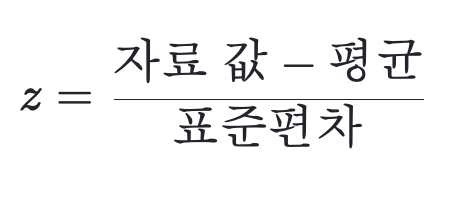

In [ ]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

In [ ]:
# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

# 그룹별 age 열의 평균 집계 연산
age_mean = grouped.age.mean()
# 그룹별 age 열의 표준편차 집계 연산
age_std = grouped.age.std()

print(age_mean, "\n")
print(age_std)

In [ ]:
# 그룹 객체의 age 열을 iteration으로 z-score를 계산하여 출력
for key, group in grouped.age:
    group_zscore = (group - age_mean.loc[key]) / age_std.loc[key]         
    print('* origin :', key)
    print(group_zscore.head(3))  # 각 그룹의 첫 3개의 행을 출력
    print('\n')

##### transform() 메소드 사용하여 z-score 직접 변환

In [ ]:
# z-score를 계산하는 사용자 함수 정의
def z_score(x): 
    return (x - x.mean()) / x.std()   

In [ ]:
# transform() 메소드를 이용하여 age 열의 데이터를 z-score로 변환
# 객체: grouped.age 

# age_zscore

In [ ]:
print(age_zscore.loc[[1, 9, 0]])     # 1, 2, 3 그룹의 첫 데이터 확인 (변환 결과)
print('\n')
print(len(age_zscore))              # transform 메소드 반환 값의 길이
print('\n')
print(age_zscore.loc[0:9])          # transform 메소드 반환 값 출력 (첫 10개)
print('\n')
print(type(age_zscore))             # transform 메소드 반환 객체의 자료형

#### 그룹 객체 필터링
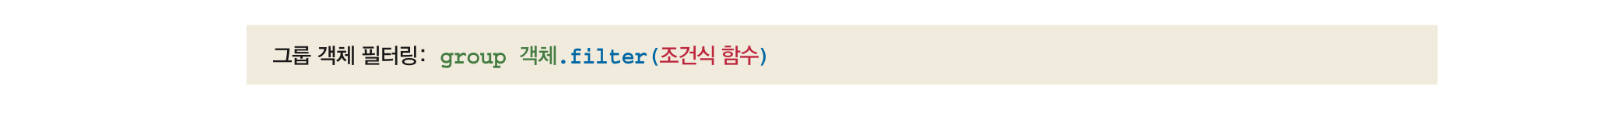
* 조건에 참인 그룹만 남김

In [ ]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [ ]:
# 데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환
# filter 인자: lambda x: len(x) >= 200

# grouped_filter

In [ ]:
# age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환
# filter 인자: lambda x: x.age.mean() < 30

# age_filter 

#### 그룹 객체에 함수 매핑
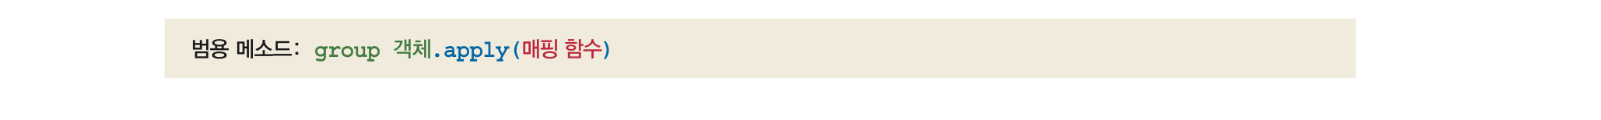

In [ ]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [ ]:
# 집계 : 각 그룹별 요약 통계정보를 집계
# apply 인자: lambda x: x.describe()

# agg_grouped 

In [ ]:
# z-score를 계산하는 사용자 함수 정의
def z_score(x):                          
    return (x - x.mean()) / x.std()

In [ ]:
# age 그룹에 z_score 함수 적용

# age_zscore 

In [ ]:
# 필터링 : age 열의 데이터 평균이 30보다 작은 그룹만을 필터링하여 출력
# apply 인자: lambda x: x.age.mean() < 30

# age_filter 

In [ ]:
for x in age_filter.index:
    if age_filter[x]==True:
        age_filter_df = grouped.get_group(x)
        print(age_filter_df.head())
        print('\n')